#3A.
A college professor believes that if the grade for internal examination is high in a class,
the grade for external examination will also be high. A random sample of 7 students in that
class was selected, and the data is given below:
Input 0.1 0.2 0.3 0.4 0.5 0.6 0.7
Target 1.2 1.4 1.55 1.75 2.01 2.2 2.35
Write a python program for linear regression using a single neuron (with proper activation
function) on the above dataset, and find the coefficients w1,and b.
Predict the external marks if internal marks are 0.15.
Draw the scatter plot between Internal Exam and External Exam .Draw a straight line with
red line using above w1, w2 and b.

In [1]:
#import Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input data
internal_marks = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
external_marks = np.array([1.2, 1.4, 1.55, 1.75, 2.01, 2.2, 2.35])

# Normalize the data
internal_marks_normalized = (internal_marks - np.mean(internal_marks)) / np.std(internal_marks)
external_marks_normalized = (external_marks - np.mean(external_marks)) / np.std(external_marks)

In [3]:
# Define the model (single neuron)
class Neuron:
    def __init__(self):
        self.w1 = np.random.randn()  # Initialize with random weight
        self.b = np.random.randn()  # Initialize with random bias

    def forward(self, x):
        return self.w1 * x + self.b

    def compute_loss(self, x, y):
        predictions = self.forward(x)
        return np.mean((predictions - y) ** 2)

    def backward(self, x, y, learning_rate):
        predictions = self.forward(x)
        dw1 = 2 * np.mean((predictions - y) * x)
        db = 2 * np.mean(predictions - y)

        # Update weights and bias
        self.w1 -= learning_rate * dw1
        self.b -= learning_rate * db

In [4]:
# Training
neuron = Neuron()
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    neuron.backward(internal_marks_normalized, external_marks_normalized, learning_rate)

# Denormalize the coefficients
w1 = neuron.w1 * np.std(external_marks) / np.std(internal_marks)
b = neuron.b * np.std(external_marks) + np.mean(external_marks)

# Predict external marks for internal marks = 0.15
internal_marks_pred = 0.15
external_marks_pred = neuron.forward((internal_marks_pred - np.mean(internal_marks)) / np.std(internal_marks)) * np.std(external_marks) + np.mean(external_marks)
print("Predicted external marks for internal marks 0.15:", external_marks_pred)

Predicted external marks for internal marks 0.15: 1.2880357164992393


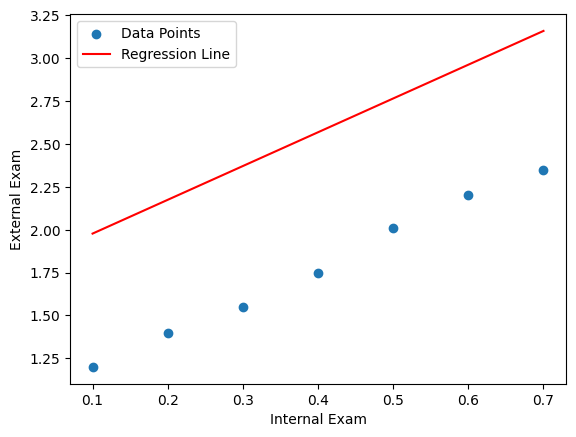

In [5]:
# Scatter plot
plt.scatter(internal_marks, external_marks, label='Data Points')
plt.xlabel('Internal Exam')
plt.ylabel('External Exam')

# Plot the regression line
x_values = np.linspace(min(internal_marks), max(internal_marks), 100)
y_values = w1 * x_values + b
plt.plot(x_values, y_values, color='red', label='Regression Line')

plt.legend()
plt.show()

#3B.
Generate 51 points for = 1 1 + exp⁡(−3x),where x ∈ [−2, 3].Use this dataset to train
sigmoid neuron using gradient descent learning algorithm. Draw two curves with different
colours, for target and output(y) of the trained neuron.

In [6]:
# Generate dataset
x_values = np.linspace(-2, 3, 51)
y_values_target = 1 / (1 + np.exp(-3 * x_values))  # Target values

# Normalize the data
x_values_normalized = (x_values - np.mean(x_values)) / np.std(x_values)
y_values_target_normalized = (y_values_target - np.mean(y_values_target)) / np.std(y_values_target)

In [7]:
# Define the sigmoid neuron
class SigmoidNeuron:
    def __init__(self):
        self.w = np.random.randn()  # Initialize weight with random value
        self.b = np.random.randn()  # Initialize bias with random value

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        z = self.w * x + self.b
        return self.sigmoid(z)

    def compute_loss(self, x, y):
        predictions = self.forward(x)
        return np.mean((predictions - y) ** 2)

    def backward(self, x, y, learning_rate):
        predictions = self.forward(x)
        dz = 2 * (predictions - y) * predictions * (1 - predictions)
        dw = np.mean(dz * x)
        db = np.mean(dz)

        # Update weights and bias
        self.w -= learning_rate * dw
        self.b -= learning_rate * db

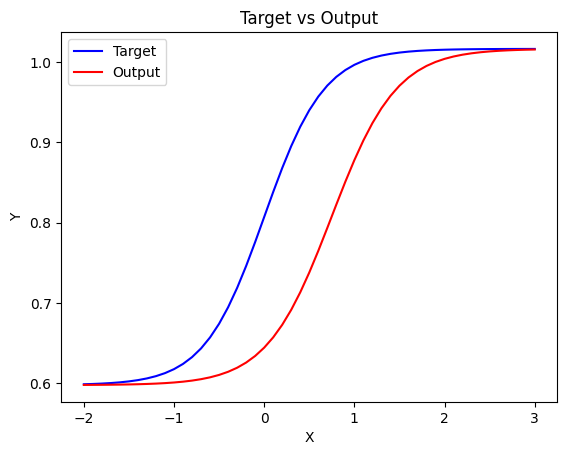

In [8]:
# Training
sigmoid_neuron = SigmoidNeuron()
learning_rate = 0.1
epochs = 1000

for epoch in range(epochs):
    sigmoid_neuron.backward(x_values_normalized, y_values_target_normalized, learning_rate)

# Calculate output values
y_values_output = sigmoid_neuron.forward(x_values_normalized) * np.std(y_values_target) + np.mean(y_values_target)

# Denormalize the data
y_values_target = y_values_target * np.std(y_values_target) + np.mean(y_values_target)

# Plotting
plt.plot(x_values, y_values_target, label='Target', color='blue')
plt.plot(x_values, y_values_output, label='Output', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Target vs Output')
plt.legend()
plt.show()